# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Radmehr Karimian
2.   Student Number: 98103556


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
cd /content/gdrive/MyDrive/DeepLearning

/content/gdrive/MyDrive/DeepLearning


In [9]:
!ls

data_HW1


In [10]:
# Change the address as you wish
plays = pd.read_csv('./data_HW1/user_artists.dat', sep='\t')
artists = pd.read_csv('./data_HW1/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [15]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(plays,artists,left_on = 'artistID',right_on = 'id')
ap = ap.sort_values(by = ["id","userID"])


In [17]:
ap = ap.reset_index(drop=True)[['id',"name","userID","artistID","weight"]]
ap

id              name  userID  artistID  weight
0          1      MALICE MIZER      34         1     212
1          1      MALICE MIZER     274         1     483
2          1      MALICE MIZER     785         1      76
3          2   Diary of Dreams     135         2    1021
4          2   Diary of Dreams     257         2     152
...      ...               ...     ...       ...     ...
92829  18741    Diamanda Galás     454     18741     301
92830  18742            Aya RL     454     18742     294
92831  18743       Coptic Rain     454     18743     287
92832  18744      Oz Alchemist     454     18744     286
92833  18745  Grzegorz Tomczak     585     18745     426

[92834 rows x 5 columns]

In [18]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

id              name  userID  artistID  playCount
0          1      MALICE MIZER      34         1        212
1          1      MALICE MIZER     274         1        483
2          1      MALICE MIZER     785         1         76
3          2   Diary of Dreams     135         2       1021
4          2   Diary of Dreams     257         2        152
...      ...               ...     ...       ...        ...
92829  18741    Diamanda Galás     454     18741        301
92830  18742            Aya RL     454     18742        294
92831  18743       Coptic Rain     454     18743        287
92832  18744      Oz Alchemist     454     18744        286
92833  18745  Grzegorz Tomczak     585     18745        426

[92834 rows x 5 columns]

In [19]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap
#TODO

id              name  userID  artistID  playCount
0          1      MALICE MIZER      34         1        212
1          1      MALICE MIZER     274         1        483
2          1      MALICE MIZER     785         1         76
3          2   Diary of Dreams     135         2       1021
4          2   Diary of Dreams     257         2        152
...      ...               ...     ...       ...        ...
92829  18741    Diamanda Galás     454     18741        301
92830  18742            Aya RL     454     18742        294
92831  18743       Coptic Rain     454     18743        287
92832  18744      Oz Alchemist     454     18744        286
92833  18745  Grzegorz Tomczak     585     18745        426

[92834 rows x 5 columns]

In [20]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################

artist_rank = ap.groupby(['name']) \
  .agg({'userID' : 'count', 'playCount' : 'sum'}) \
  .rename(columns={"userID" : 'totalUniqueUsers', "playCount" : "totalArtistPlays"}) \
  .sort_values(['totalArtistPlays'], ascending=False)

artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [21]:
artist_rank

totalUniqueUsers  totalArtistPlays  avgUserPlays
name                                                                
Britney Spears                   522           2393140   4584.559387
Depeche Mode                     282           1301308   4614.567376
Lady Gaga                        611           1291387   2113.563011
Christina Aguilera               407           1058405   2600.503686
Paramore                         399            963449   2414.659148
...                              ...               ...           ...
Morris                             1                 1      1.000000
Eddie Kendricks                    1                 1      1.000000
Excess Pressure                    1                 1      1.000000
My Mine                            1                 1      1.000000
A.M. Architect                     1                 1      1.000000

[17632 rows x 3 columns]

In [24]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap = pd.merge(ap, artist_rank,left_on = 'name', right_on='name')
ap = ap.sort_values(by = "playCount",ascending=False)

In [25]:
ap.head(20)

id                name  userID  artistID  playCount  \
2800    72        Depeche Mode    1642        72     352698   
35843  792              Thalía    2071       792     324663   
27302  511                  U2    1094       511     320725   
8152   203                Blur    1905       203     257978   
26670  498            Paramore    1664       498     227829   
21191  378         Evanescence    1146       378     203165   
14165  292  Christina Aguilera     514       292     176133   
33309  701             Shakira    1983       701     172496   
33127  701             Shakira     757       701     169596   
31835  679           Glee Cast    1086       679     165902   
26983  503           In Flames     903       503     146411   
32498  687        All Time Low     946       687     144559   
13324  289      Britney Spears     542       289     131733   
21165  378         Evanescence     938       378     129595   
13680  289      Britney Spears    2031       289     128654   
25865  486  30 Seconds to Mars    1368       486     125471   
5575   163          Pink Floyd     292       163     123065   
3640    89           Lady Gaga    1135        89     114672   
6792   187                a-ha     442       187     112009   
7737   198    System of a Down     459       198     110185   

       totalUniqueUsers_x  totalArtistPlays_x  avgUserPlays_x  \
2800                  282             1301308     4614.567376   
35843                  26              350035    13462.884615   
27302                 185              493024     2664.994595   
8152                  114              318221     2791.412281   
26670                 399              963449     2414.659148   
21191                 226              513476     2272.017699   
14165                 407             1058405     2600.503686   
33309                 319              688529     2158.398119   
33127                 319              688529     2158.398119   
31835                 249              506453     2033.947791   
26983                  67              237148     3539.522388   
32498                  77              215777     2802.298701   
13324                 522             2393140     4584.559387   
21165                 226              513476     2272.017699   
13680                 522             2393140     4584.559387   
25865                 216              485532     2247.833333   
5575                  258              466104     1806.604651   
3640                  611             1291387     2113.563011   
6792                   97              205195     2115.412371   
7737                  181              277397     1532.580110   

       totalUniqueUsers_y  totalArtistPlays_y  avgUserPlays_y  
2800                  282             1301308     4614.567376  
35843                  26              350035    13462.884615  
27302                 185              493024     2664.994595  
8152                  114              318221     2791.412281  
26670                 399              963449     2414.659148  
21191                 226              513476     2272.017699  
14165                 407             1058405     2600.503686  
33309                 319              688529     2158.398119  
33127                 319              688529     2158.398119  
31835                 249              506453     2033.947791  
26983                  67              237148     3539.522388  
32498                  77              215777     2802.298701  
13324                 522             2393140     4584.559387  
21165                 226              513476     2272.017699  
13680                 522             2393140     4584.559387  
25865                 216              485532     2247.833333  
5575                  258              466104     1806.604651  
3640                  611             1291387     2113.563011  
6792                   97              205195     2115.412371  
7737                  181             

# Exploration

In [26]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


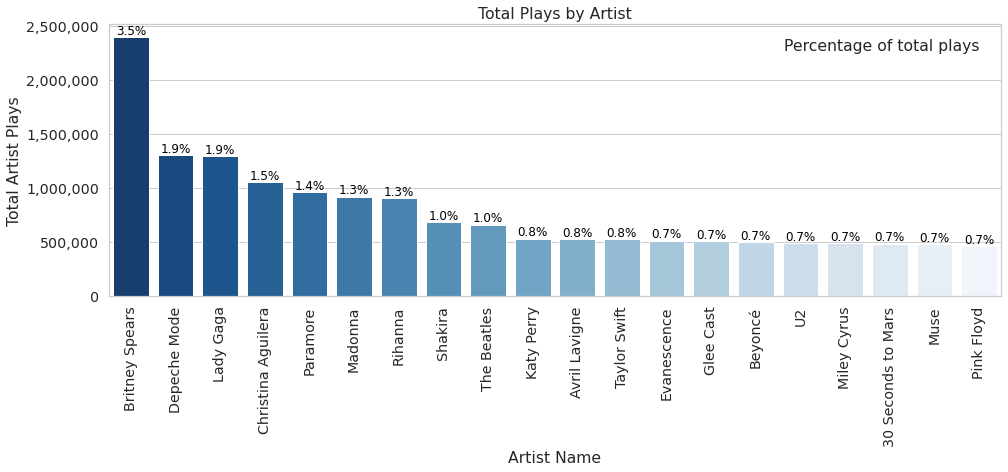

In [27]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


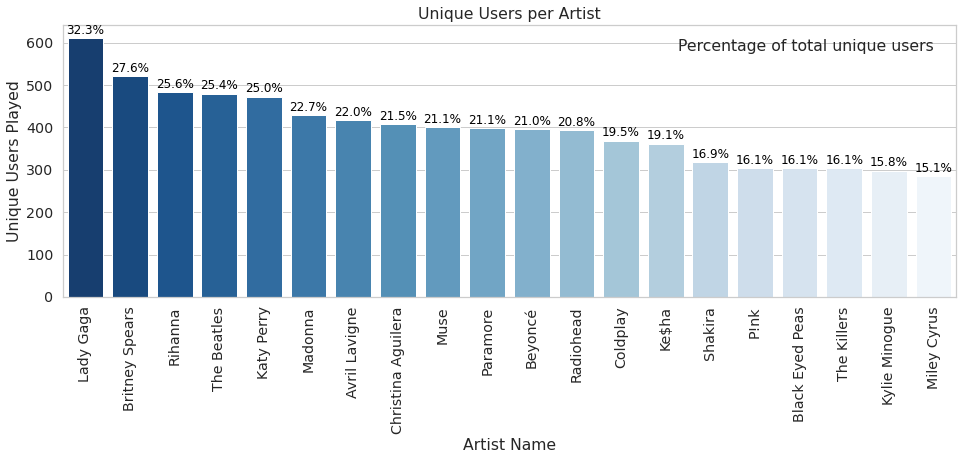

In [28]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


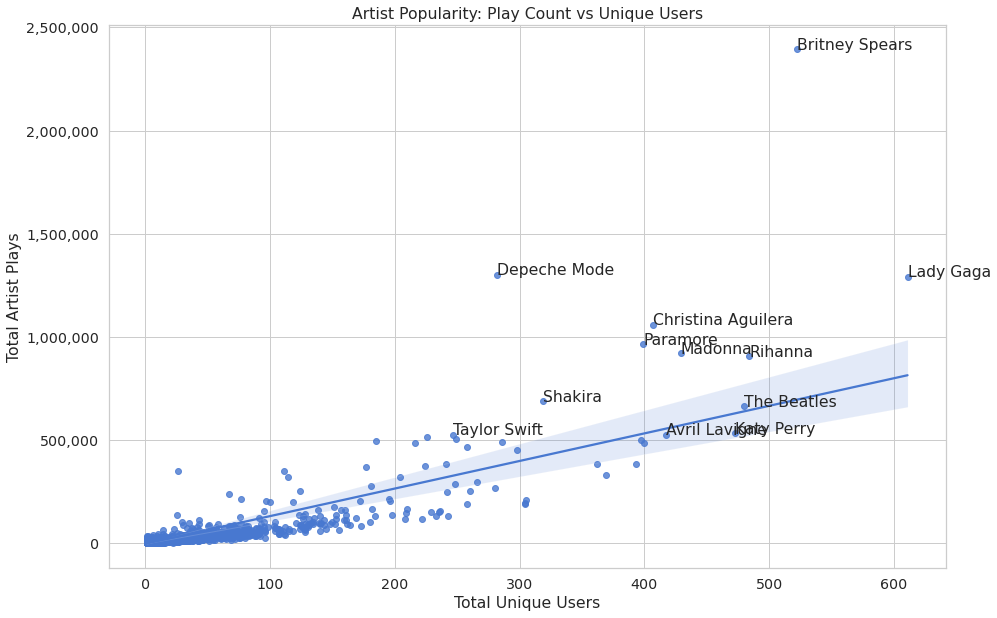

In [33]:
top_artists = artist_rank.index[:12] # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank['totalUniqueUsers']# TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays'] # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index #: index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [34]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [35]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df =  ap.pivot(
    index='userID', 
    columns='artistID', 
    values='playCountScaled'
)

In [36]:
ratings_df

artistID  1      2         3      4      5         6      7      8      9      \
userID                                                                          
2           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
3           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
4           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
5           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
6           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
...         ...    ...       ...    ...    ...       ...    ...    ...    ...   
2095        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2096        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2097        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2099        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2100        NaN    NaN  0.001154    NaN    NaN  0.001143    NaN    NaN    NaN   

artistID  10     ...  18736  18737  18738  18739  18740  18741  18742  18743  \
userID           ...                                                           
2           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2095        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2096        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2097        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2099        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2100        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

artistID  18744  18745  
userID                  
2           NaN    NaN  
3           NaN    NaN  
4           NaN    NaN  
5           NaN    NaN  
6           NaN    NaN  
...         ...    ...  
2095        NaN    NaN  
2096        NaN    NaN  
2097        NaN    NaN  
2099        NaN    NaN  
2100        NaN    NaN  

[1892 rows x 17632 columns]

In [37]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings = ratings_df.fillna(0).values

In [38]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('{:.2f}%'.format(sparsity))
## END

0.28%


# Fitting(Training) Model (50pts)

In [39]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    validation = np.zeros(ratings.shape)
    train = ratings.copy()
    
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(
                ratings[user, :].nonzero()[0], 
                size=DELETE_RATING_COUNT,
                replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [40]:
train, val = train_test_split(ratings)

In [42]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [55]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    return np.dot(P.T, Q)
  
  def fit(self, X_train, X_val):
    m, n = X_train.shape

    self.P = 3 * np.random.rand(self.n_latent_features, m)
    self.Q = 3 * np.random.rand(self.n_latent_features, n)
    
    self.train_error = []
    self.val_error = []

    users, items = X_train.nonzero()
    
    for epoch in range(self.n_epochs):
        for u, i in zip(users, items):
            error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
            self.P[:, u] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[:, u])
            self.Q[:, i] += self.learning_rate * (error * self.P[:, u] - self.lmbda * self.Q[:, i])

        train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
        val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
        self.train_error.append(train_rmse)
        self.val_error.append(val_rmse)
        
    return self
  
  def predict(self, X_train, user_index):
    y_hat = self.predictions(self.P, self.Q)
    predictions_index = np.where(X_train[user_index, :] == 0)[0]
    return y_hat[user_index, predictions_index].flatten()

In [56]:
#creating recommender object
recommender = Recommender().fit(train, val)

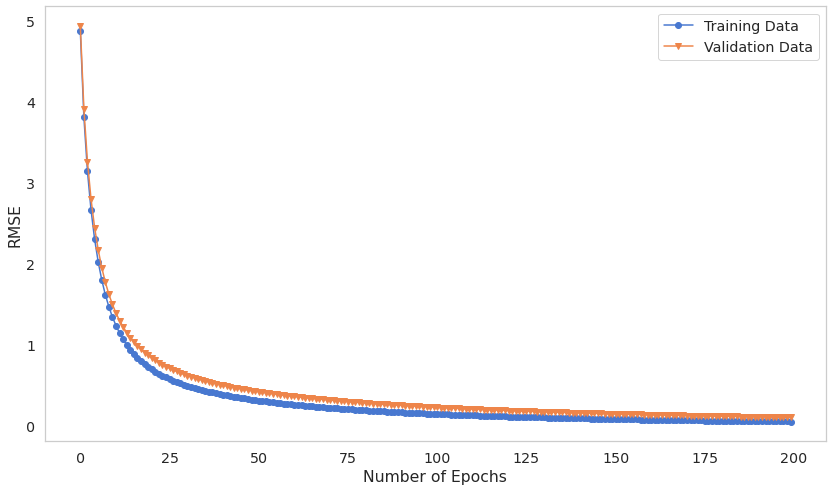

In [50]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
plt.plot(range(recommender.n_epochs), recommender.train_error, marker='o', label='Training Data');
plt.plot(range(recommender.n_epochs), recommender.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()
#TODO

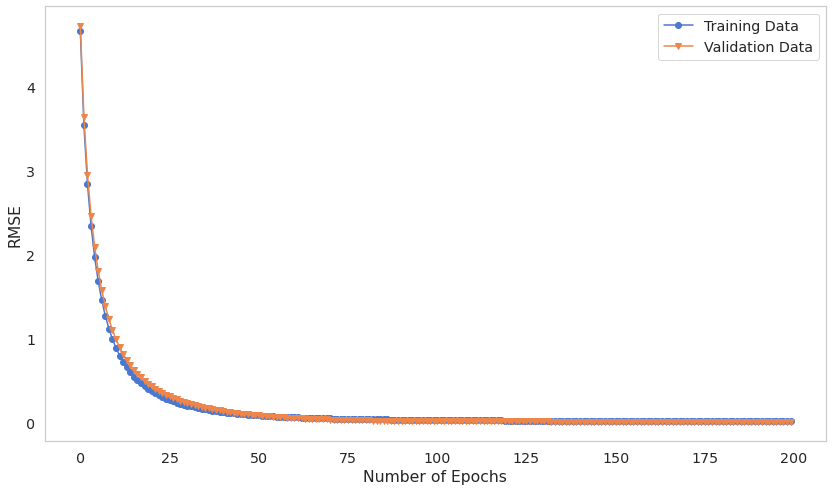

In [57]:
plt.plot(range(recommender.n_epochs), recommender.train_error, marker='o', label='Training Data');
plt.plot(range(recommender.n_epochs), recommender.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

by setting higher lambda like one you can see diffrence is noticable.

# Making recommendations

In [51]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [52]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [53]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

id               name    rating
0     7     Marilyn Manson  0.196486
1   472       3 Doors Down  0.043204
2   614          Pearl Jam  0.042016
3   923  Children of Bodom  0.025657
4   978          Disturbed  0.021690
5  1104          Rammstein  0.021562
6  1118   A Perfect Circle  0.020879
7  2172             Gojira  0.017051
8  6257         Rob Zombie  0.016280
9  6618                D12  0.010990

In [54]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

id              name    rating
0   7098            WarCry  0.271646
1   8519          Poccolus  0.257797
2  10493       Sektor Gaza  0.255879
3  11950  Bromheads Jacket  0.254456
4  13137           Pastora  0.253388
5  14564        Andy Shauf  0.252921
6  16107  Freddie McGregor  0.250554
7  17803   Sophie Rimheden  0.249490
8  18543            Advent  0.249015
9  18676       Mehmet Atlı  0.248667

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**